# Aggregate

Plot fusion results across all files

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import json
import os

In [37]:
with open('config.json') as f:
    data = json.load(f)

if (data['dirName'] != ""):
    full_path = f"{data['dirPath']}/{data['dirName']}"
else:
    # get the most recently run experiment
    path = data['dirPath']
    folder_names = sorted([f for f in os.listdir(path) if os.path.isdir(os.path.join(path, f))])
    print(folder_names)
    most_recent = folder_names[-1]
    print(f"defaulting to most recent experiment: {most_recent}")
    full_path = f"{path}/{most_recent}"

['2025_01_03_00:45:11.404211', '2025_01_06_13:50:18.467232', '2025_01_16_11:51:09.457498', '2025_01_16_11:56:25.156789', '2025_01_20_23:20:58.974075', '2025_01_21_12:53:42.004310', '2025_01_31_11:53:15.839558', '2025_01_31_11:59:15.840397', '2025_01_31_12:03:34.432696', '2025_01_31_12:11:07.865410', '2025_01_31_12:13:28.094981', '2025_01_31_12:14:53.868702', '2025_01_31_12:17:54.755357', '2025_01_31_12:20:34.067748', '2025_01_31_12:25:04.471934', '2025_01_31_12:27:30.405486', '2025_01_31_12:55:27.056488', '2025_02_01_00:26:54.678826', '2025_02_01_00:30:22.722884', '2025_02_01_12:03:08.178016', '2025_02_01_12:03:52.787178', '2025_02_01_12:04:25.532501', '2025_02_01_12:06:37.568211', '2025_02_01_12:08:22.229146', '2025_02_01_12:09:41.775555', '2025_02_01_12:11:55.221841', '2025_02_01_15:33:12.499646', '2025_02_04_17:18:47.597629', '2025_02_04_20:39:58.719140', '2025_02_04_20:40:32.478660', '2025_02_04_20:45:06.111574', '2025_02_04_20:45:31.402333', '2025_02_04_20:49:45.422073', '2025_02_

In [38]:
csv_path = f"{full_path}/aggregate.csv"
img_path = f"{full_path}/aggregate.png"

In [39]:
df = pd.read_csv(csv_path)

In [40]:
allowed_titles = ['arithmetic end memory/branch']
df = df[df['rule_title'].isin(allowed_titles)]

grouped = df.groupby(['rule_title'], dropna=False, sort=False)

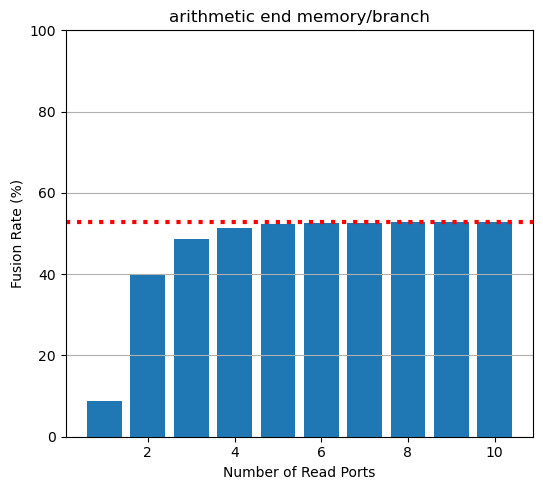

In [ ]:
num_groups = len(grouped)
cols = 4
rows = math.ceil(num_groups / cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 5 * rows))
axes = axes.flatten()

for i, (group_name, group_data) in enumerate(grouped):
    data = group_data.reset_index()
    first_value = data['percentage_fused'].iloc[0]
    axes[i].axhline(y=first_value, color='red', linestyle='dotted', linewidth=3)
    axes[i].bar(data['user_defined_key'][1:101], data['percentage_fused'][1:101])
    axes[i].set_title(f'{group_name}')
    axes[i].set_xlabel('Number of Write Ports')
    axes[i].set_ylabel('Fusion Rate (%)')
    axes[i].tick_params(axis='x')
    axes[i].grid(axis='y')
    axes[i].set_ylim(bottom=0, top=100)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
# plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.savefig(img_path, dpi=300, bbox_inches='tight')
plt.show()